#     COURSE: Linear algebra: theory and implementation
##    SECTION: Projections and orthogonalization

#### Instructor: sincxpress.com
##### Course url: https://www.udemy.com/course/linear-algebra-theory-and-implementation/?couponCode=202110

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Projections in R^2
---


0.4482758620689655


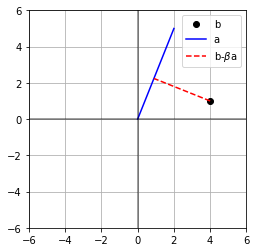

In [13]:

# point b
b = np.array([4,1])
# a = np.random.randint(-3,4,(2))

# line a
a = np.array([ 2, 5 ])
# a = np.random.randint(-3,4,(2))
# beta
beta = (a.T@b) / (a.T@a)
print(beta)

# draw!
plt.plot(b[0],b[1],'ko',label='b')
plt.plot([0, a[0]],[0, a[1]],'b',label='a')

# axis lines
plt.plot((-6,6),(0,0),'k-',alpha=0.5)
plt.plot((0,0),(-6,6),'k-',alpha=0.5)

# now plot projection line
plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]],'r--',label=r'b-$\beta$a')
plt.axis('square')
plt.grid()
plt.legend()
plt.axis((-6, 6, -6, 6))

plt.show()


---
# VIDEO: Projections in R^N
---


In [14]:
## the goal here is to solve Ax=b for x

# sizes
m = 16
n = 10

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)

# solution using explicit inverse
x1 = np.linalg.inv(A.T@A) @ (A.T@b)

# python solution (better method)
x2 = np.linalg.solve(A.T@A,A.T@b)

# show that the results are the same
print(np.round(x1.T,3))
print(np.round(x2.T,3))

[[-0.016  0.021 -0.116 -0.443  0.333  0.581 -0.362  0.    -0.024  0.613]]
[[-0.016  0.021 -0.116 -0.443  0.333  0.581 -0.362  0.    -0.024  0.613]]


In [15]:
## geometric perspective in R^3

# matrix sizes
m = 3
n = 2

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)


# solution
x = np.linalg.solve(A.T@A,A.T@b)
Ax = A@x

print(b.T)
print(Ax.T) # they should be the same but are actually different...

[[ 1.17187616  0.31521809 -0.35300557]]
[[ 1.20979787  0.23757131 -0.23751323]]


C:\Users\kaiyo\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\kaiyo\anaconda3\lib\site-packages\numpy\lib\stride_tricks.py:116: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  array = np.array(array, copy=False, subok=subok)
C:\Users\kaiyo\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengt

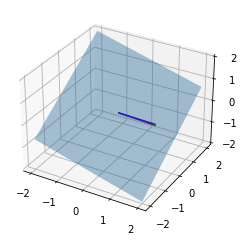

In [16]:
## plot
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.gca(projection='3d')

# plot the vectors
ax.plot([0, b[0]],[0, b[1]],[0, b[2]],'r')
ax.plot([0, Ax[0]],[0, Ax[1]],[0, Ax[2]],'b')

# plot the projection line
ax.plot( [Ax[0][0], b[0]],
         [Ax[1][0], b[1]],
         [Ax[2][0], b[2]], 'g')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-2,2), np.linspace(-2,2))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1,alpha=.4)

plt.show()

---
# Code challenge: decompose vector to orthogonal components
---

In [9]:
# vector w, to be decomposed
w = np.random.randint(-10,11,(2))

# vector v, the reference
v = np.random.randint(-10,11,(2))

# compute the decomposed vectors
w_para_v = ((w.T@v.T)/(v.T@v))*v
# w_para_v = w_para_v.T

w_perp_v = w - w_para_v
# w_ort_v = w_ort_v.T

In [10]:
print(w)

[ 0 -9]


In [11]:
print(w_para_v)

[-4.46017699 -5.09734513]


In [12]:
print(w_perp_v)

[ 4.46017699 -3.90265487]


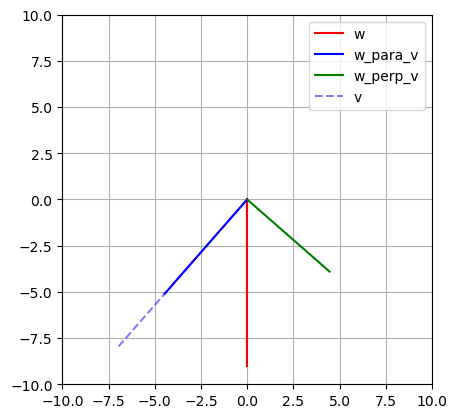

In [16]:
# plot

plt.plot((0,w[0]),(0,w[1]),'r-',label='w')
plt.plot((0,w_para_v[0]),(0,w_para_v[1]),'b-',label='w_para_v')
plt.plot((0,w_perp_v[0]),(0,w_perp_v[1]),'g-',label='w_perp_v')
plt.plot((0,v[0]),(0,v[1]),'b--',label='v',alpha=0.5)


# plotting
plt.legend()
plt.axis('square')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.show()

---
# Orthogonal matrix
---

In [18]:
Q = 1/3 * np.array([[2,1],[-2,2],[1,2]])

In [19]:
Q.shape

(3, 2)

In [23]:
print(Q)

[[ 0.66666667  0.33333333]
 [-0.66666667  0.66666667]
 [ 0.33333333  0.66666667]]


In [21]:
print(Q.T)

[[ 0.66666667 -0.66666667  0.33333333]
 [ 0.33333333  0.66666667  0.66666667]]


In [32]:
# For my info
print(np.linalg.pinv(Q))

[[ 0.66666667 -0.66666667  0.33333333]
 [ 0.33333333  0.66666667  0.66666667]]


In [28]:
np.round(Q.T@Q,3) # identity

array([[1., 0.],
       [0., 1.]])

In [29]:
np.round(Q@Q.T,3)

array([[ 0.556, -0.222,  0.444],
       [-0.222,  0.889,  0.222],
       [ 0.444,  0.222,  0.556]])


---
# VIDEO: QR decomposition
---


In [17]:
# example from the slides

A = [ [1,0],
      [1,0],
      [0,1] ]

# "full" QR decomposition
Q,R = np.linalg.qr(A,'complete')
print(Q), print(' ')

# "economy" QR decomposition
Q,R = np.linalg.qr(A) # is the default option in Python
print(Q)

[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]
 
[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]


In [40]:
## another example

# the to-be-decomposed matrix
M = np.array( [ [1, 1,-2], [3,-1, 1] ] )

# QR decomposition
Q,R = np.linalg.qr(M,'complete')

# notice:
print('R from QR: '),print(np.round(R,4))
print('R from Q^TM: '),print(np.round(Q.T@M,4))

R from QR: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]
R from Q^TM: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]


(None, None)

In [44]:
print(M)

[[ 1  1 -2]
 [ 3 -1  1]]


In [45]:
print(Q)

[[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]


In [46]:
print(R)

[[-3.16227766  0.63245553 -0.31622777]
 [ 0.         -1.26491106  2.21359436]]


[]

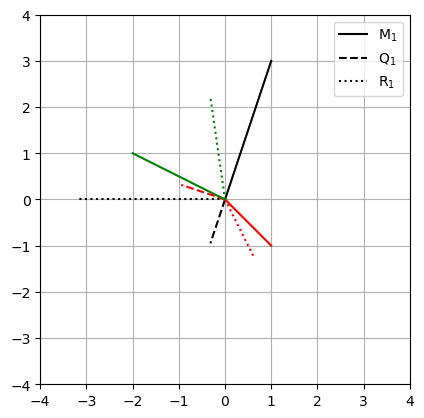

In [42]:
# plot
colorz = 'krg'

for i in range(0,np.shape(M)[1]):
    
    # plot original vector M
    plt.plot([0,M[0,i]],[0,M[1,i]],colorz[i])
    
    # plot orthogonalized vector Q
    if i<np.shape(Q)[1]:
        plt.plot([0,Q[0,i]],[0,Q[1,i]],colorz[i],linestyle='--')
    
    # plot residual vector R
    plt.plot([0,R[0,i]],[0,R[1,i]],colorz[i],linestyle=':')

    
plt.legend(['M$_1$','Q$_1$','R$_1$'])
plt.axis('square')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid(True)
plt.plot()

# Code challenge: Gram-Schmidt algorithm
Implement the G-S procedure in code!

In [195]:
# start with a square matrix
n = 5
A = np.random.randint(-10,11,(n,n))

In [196]:
print(A)

[[ 4  9 -2  6  1]
 [-1  3  3 -4  0]
 [ 2 -6  2 -3 -6]
 [-5 -3  6  9 -4]
 [ 6  0  9  8 -8]]


In [197]:
A[:,0]

array([ 4, -1,  2, -5,  6])

In [198]:
np.linalg.norm(A)

25.96150997149434

In [199]:
np.linalg.norm(A[:,col])

10.816653826391969

In [200]:
A[:,col]

array([ 1,  0, -6, -4, -8])

In [201]:
list(range(A.shape[1]))

[0, 1, 2, 3, 4]

In [202]:
def orth_mat(A: np.array):
    Q = np.zeros((A.shape))

    # Loop over columns
    for i in range(A.shape[1]):
        Q[:,i] = A[:,i]
        a = A[:,i] # just take out the column verctor for the next operations
        # step 1: orthogonilize the i-th column in Q, relative to previous columns in A
        for j in range(i): # not including the current column!
            q = Q[:,j] # just take out the column verctor for the next operations
            Q[:,i] = Q[:,i] - np.dot(a,q) / np.dot(q,q) * q
        # step 2: normalize i-th column of Q
        Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])
    return Q

In [203]:
m = 2 # rows
n = 4 # columns
A = np.random.randn(m,n)

Q = orth_mat(A)
print(Q)

[[-0.67126278  0.74121946 -0.70710678 -0.70710678]
 [-0.74121946 -0.67126278  0.70710678  0.70710678]]


In [204]:
Q2,R = np.linalg.qr(A)
print(Q2)

[[-0.67126278 -0.74121946]
 [-0.74121946  0.67126278]]


# Code challenge: Inverse via QR

In [164]:
# generate a large (e.g., N=100) matrix and invert using QR and inv()
m = 100
n = 100

A = np.random.randint(-10,11,(m,n))

Q, R = np.linalg.qr(A)

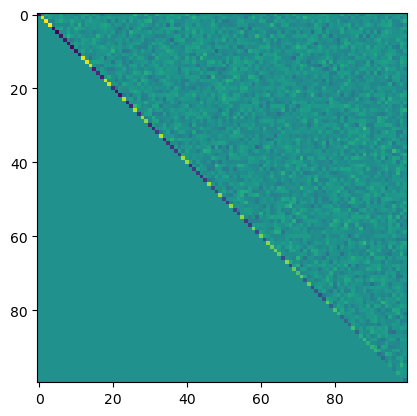

In [167]:
plt.imshow(R)
plt.show() # you can see it is upper triangular

In [168]:
# Apply the formula of inverse via QR
A_inv = np.linalg.inv(R) @ Q.T
print(A_inv)

[[ 0.11032942  0.01246746 -0.06533175 ... -0.00949516  0.02907996
  -0.01393779]
 [ 0.06050108 -0.0044078  -0.03736317 ... -0.00701253  0.00659002
   0.00504188]
 [ 0.11839706  0.02379395 -0.07331608 ... -0.01686568  0.03946909
  -0.02092251]
 ...
 [-0.03632318 -0.00376364  0.02684525 ...  0.00821725  0.00320847
   0.00617374]
 [ 0.1002599   0.03076525 -0.05303156 ... -0.01530025  0.01396827
  -0.03343427]
 [-0.00881062 -0.00423253 -0.00563928 ...  0.00347783  0.01120886
   0.00424204]]


In [173]:
# compare it with the built-in function
A_inv_b = np.linalg.inv(A)
A_inv_b = np.linalg.solve(R,Q.T) # this is better for implementation

print(A_inv_b)

[[ 0.11032942  0.01246746 -0.06533175 ... -0.00949516  0.02907996
  -0.01393779]
 [ 0.06050108 -0.0044078  -0.03736317 ... -0.00701253  0.00659002
   0.00504188]
 [ 0.11839706  0.02379395 -0.07331608 ... -0.01686568  0.03946909
  -0.02092251]
 ...
 [-0.03632318 -0.00376364  0.02684525 ...  0.00821725  0.00320847
   0.00617374]
 [ 0.1002599   0.03076525 -0.05303156 ... -0.01530025  0.01396827
  -0.03343427]
 [-0.00881062 -0.00423253 -0.00563928 ...  0.00347783  0.01120886
   0.00424204]]


In [174]:
print(np.round(A_inv - A_inv_b,3))

[[ 0. -0.  0. ... -0. -0. -0.]
 [-0.  0.  0. ...  0. -0. -0.]
 [ 0.  0.  0. ... -0.  0.  0.]
 ...
 [ 0. -0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [178]:
np.corrcoef((A_inv.flatten(), A_inv_b.flatten()))

array([[1., 1.],
       [1., 1.]])

# Code challenge: Prove and demonstrate the Sherman-Morrison inverse

skip